# **Introducción**

En el siguiente cuaderno se muestra la aplicación del filtro de imagenes "Contraste" comparando las ejecuciones mediante CPU y GPU. Para aplicar un valor de contraste a una imagen, debemos calcular un factor con la siguiente fórmula: 

<center>$ Factor= (259 * (Contraste+255)) / (255 * (259-Contraste)) $</center>

Con el valor obtenido, se debe aplicar a cada pixel (rojo, verde y azul) de la imagen.



# **Armado del ambiente**
-Toma la dirección web de una imagen con acceso público en internet, la deja disponible al contexto de ejecución del cuaderno Colab.

-Para la ejecución GPU, se debe instalar en el cuaderno en componente Python para CUDA.

-Para ambas ejecuciones se debe selecionar el valor de contraste a aplicar.

In [23]:
#@title ## -Seleccionar Imagen a aplicar filtro
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen = "https://github.com/SOA-1C-2021/HPC/blob/main/Cataratas_de_Iguazu.jpg?raw=true" #@param {type:"string"}

!wget {url_imagen} -O imagen.jpg


--2021-06-30 22:54:22--  https://github.com/SOA-1C-2021/HPC/blob/main/Cataratas_de_Iguazu.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SOA-1C-2021/HPC/raw/main/Cataratas_de_Iguazu.jpg [following]
--2021-06-30 22:54:22--  https://github.com/SOA-1C-2021/HPC/raw/main/Cataratas_de_Iguazu.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SOA-1C-2021/HPC/main/Cataratas_de_Iguazu.jpg [following]
--2021-06-30 22:54:22--  https://raw.githubusercontent.com/SOA-1C-2021/HPC/main/Cataratas_de_Iguazu.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent

In [4]:
#@title ## -Instalación de Paquete *Python* para CUDA (aplica para la ejecución GPU)
#@markdown ---

!pip install pycuda


     |████████████████████████████████| 1.7MB 21.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627583 sha256=a5ab191ccc975956003f97d52b3f3e9d821c978fd25ec4b0dcd0aaf228eb5d9a
  Stored in directory: /root/.cache/pip/wheels/d5/55/64/fd4dddcc5f1c25eebd90b5291c3769101dc978c70165685512
Successfully built pycuda
  Created wheel for pytools: filename=pytools-2021.2.7-py2.py3-none-any.whl size=60644 sha256=45aff92b082724c138a094ca38ee2033320af37bf34592f787b2e75029a699f3
  Stored in directory: /root/.cache/pip/wheels/a0/b5/e5/e65d25997fd77729b9aa214645add18688483e48bbcbab6ffc
Successfully built pytools


In [20]:
#@title ## -Seleccionar valor de <strong>Contraste</strong> a aplicar:
#@markdown ---
contraste = -128 #@param {type:"slider", min:-255, max:255, step:1}


# Desarrollo CPU

Imagen del filtro: imagen.jpg -RGB- [1023, 682]
El contraste es: -128
El factor es: 0.3333130668287987
Tiempo de conversión de imagen: 11017.623 [ms]
Tiempo Total: 11081.992 [ms]


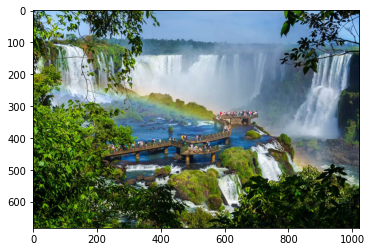

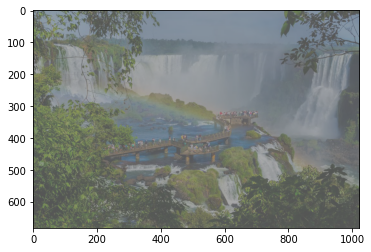

In [24]:
 %matplotlib inline
from datetime import datetime

tiempo_total = datetime.now()

import  matplotlib.pyplot as plt
import numpy
from PIL import Image 

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------


img_nombre = 'imagen.jpg'
image = Image.open( img_nombre ) 
  
# Obtengo las proporciones de la imagen. 
img_ancho, img_alto = image.size 

# Convierto la imagen comprimida en JPEG/PNG a array.
img_pic_cpu = numpy.asarray(image)
img_pic_cpu = img_pic_cpu.astype( numpy.int32() )

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
img_picR_cpu = numpy.empty_like( img_pic_cpu)

# Muestro los atributos de la imagen y como se ve.
print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

# Muestro la imagen antes de aplicarle el filtro.
plt.figure()
imgplot=plt.imshow( img_pic_cpu )

tiempo_img = datetime.now()

# Calcular factor a aplicar en la formula de CONTRASTE
factor = (259*(contraste+255)) / (255*(259-contraste))

print("El contraste es:", contraste);
print("El factor es:", factor);

# Convierto la imagen según el valor de contraste ingresado por parámetro
for y  in range( 0, img_alto ):
  for x in range( 0, img_ancho ):
    pixelrojo, pixelverde, pixelazul = img_pic_cpu[y][x]

    nvopixelrojo = (factor*(pixelrojo-128) + 128)
    nvopixelverde = (factor*(pixelverde-128) + 128)
    nvopixelazul = (factor*(pixelazul-128) + 128)
    img_picR_cpu[y][x] = [nvopixelrojo, nvopixelverde, nvopixelazul]

tiempo_img = datetime.now() - tiempo_img

# Muestro la imagen luego de aplicarle el filtro.
plt.figure()
imgplot = plt.imshow( img_picR_cpu )

tiempo_total = datetime.now() - tiempo_total

print( "Tiempo de conversión de imagen:", tiempo_en_ms( tiempo_img   ), "[ms]" )
print( "Tiempo Total:",                   tiempo_en_ms( tiempo_total ), "[ms]" )


---
# Desarrollo GPU

El contraste es: -128
El factor es: 0.3333130668287987
Imagen del filtro: imagen.jpg -RGB- [1023, 682]
Thread: [ 16 , 19  ], Bloque : [ 64 , 36 ]
Total de Thread: [ 1024 , 684  ]  =  700416
Tiempo TOTAL:  350.359 [ms]
Tiempo GPU  :  0.254 [ms]


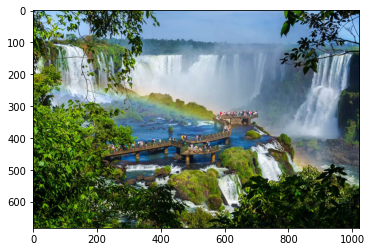

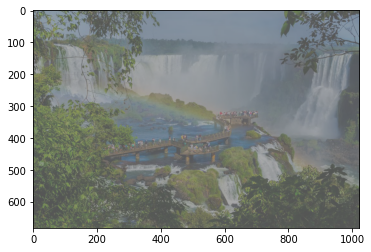

In [25]:
%matplotlib inline
from datetime import datetime
tiempo_total = datetime.now()

import matplotlib.pyplot as plt
import numpy
from PIL import Image 
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

img_nombre = 'imagen.jpg'
image = Image.open( img_nombre ) 
  
# summarize some details about the image 
img_ancho, img_alto  = image.size 

# Convierto la imagen comprimida en JPEG/PNG a array
img_O_cpu = numpy.asarray(image)
img_O_cpu = img_O_cpu.astype( numpy.int32() )
img_R_cpu = numpy.empty_like( img_O_cpu)

# Reservo los 2 vectores en GPU(3 pixeles usa RGB * (el tamaño del array))
img_O_gpu = cuda.mem_alloc( img_O_cpu.nbytes )
img_R_gpu = cuda.mem_alloc( img_R_cpu.nbytes )

# GPU - Copio la memoria al GPU.
cuda.memcpy_htod( img_O_gpu, img_O_cpu )
cuda.memcpy_htod( img_R_gpu, img_R_cpu )

# Calcular factor a aplicar en la formula de CONTRASTE
factor = (259*(contraste+255)) / (255*(259-contraste));

print("El contraste es:", contraste);
print("El factor es:", factor);

# CPU - Defino la función kernel que ejecutará en GPU.
module = SourceModule(""" 
__global__ void kernel_img( float factor, int ancho, int alto, int *img_O, int *img_R )
{
  // Calculo las coordenadas del Thread en dos dimensiones.
  int idx = threadIdx.x + blockIdx.x*blockDim.x;
  int idy = threadIdx.y + blockIdx.y*blockDim.y;
  //float factor = 0.0;
  float nvopixelrojo;
  float nvopixelverde;
  float nvopixelazul;
 
  // Verifico que los Thread, esten dentro de las dimensiones de la imagen.
  if( idx < ancho && idy < alto )
  {
    // Calculo el nuevo color para el pixel a partir de los componentes.
    nvopixelrojo =  (float)(factor*(img_O[((idx+(idy*ancho))*3)+0]-128) + 128); //Rojo
    nvopixelverde = (float)(factor*(img_O[((idx+(idy*ancho))*3)+1]-128) + 128); //Verde
    nvopixelazul =  (float)(factor*(img_O[((idx+(idy*ancho))*3)+2]-128) + 128); //Azul

    // Escribo el nuevo color del pixel.
    img_R[(idx+(idy*ancho))*3+0] = (int) nvopixelrojo;
    img_R[(idx+(idy*ancho))*3+1] = (int) nvopixelverde;
    img_R[(idx+(idy*ancho))*3+2] = (int) nvopixelazul;
  }
}
""") 

# Muestro los atributos de la imagen y como se ve antes del seudo filtro.
print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

# CPU - Genero la función kernel.
kernel = module.get_function("kernel_img")

tiempo_img = datetime.now()

dim_hilo_x = 16
dim_bloque_x = numpy.int( (img_ancho+dim_hilo_x-1) / dim_hilo_x )

dim_hilo_y = 19
dim_bloque_y = numpy.int( (img_alto+dim_hilo_y-1) / dim_hilo_y )

print( "Thread: [", dim_hilo_x, ",", dim_hilo_y, " ], Bloque : [", dim_bloque_x, ",", dim_bloque_y, "]" )
print( "Total de Thread: [", dim_hilo_x*dim_bloque_x, ",", dim_hilo_y*dim_bloque_y, " ]", " = ", dim_hilo_x*dim_bloque_x*dim_hilo_y*dim_bloque_y )

tiempo_img = datetime.now()

kernel( numpy.float32(factor), numpy.int32(img_ancho), numpy.int32(img_alto), img_O_gpu, img_R_gpu, block=( dim_hilo_x, dim_hilo_y, 1 ), grid=(dim_bloque_x, dim_bloque_y,1) )

tiempo_img = datetime.now() - tiempo_img

# GPU - Copio el resultado desde la memoria GPU.
cuda.memcpy_dtoh( img_R_cpu, img_R_gpu )

# Muestro la imagen Original el filtro.
plt.figure()
imgplot=plt.imshow( img_O_cpu )

# Muestro la imagen luego de aplicarle el filtro.
plt.figure()
imgplot=plt.imshow( img_R_cpu )

tiempo_total = datetime.now() - tiempo_total

print("Tiempo TOTAL: ", tiempo_en_ms( tiempo_total ), "[ms]" )
print("Tiempo GPU  : ", tiempo_en_ms( tiempo_img ), "[ms]" )

---
# Métricas


Resultados obtenidos con la imagen (URL: *https://github.com/SOA-1C-2021/HPC/raw/main/Cataratas_de_Iguazu.jpg*) y el valor de Contraste <strong>-128</strong>

**Ejecución CPU:**
   
*   *Tiempo de conversión de imagen*: 11097.935 [ms] ~ 11 segundos
*   *Tiempo Total*: 11161.975 [ms] ~ 11 segundos

**Ejecución GPU:**

*   *Tiempo GPU*  : 0.171 [ms] ~ 0.000171 segundos
*   *Tiempo TOTAL*: 74.059 [ms] ~ 0.074059 segundos



# Conclusiones

La aplicación del filtro ejecutada con en el entorno de ejecución GPU es alrededor de 10 veces más rápida, ya que realiza los calculos a aplicar en hilos que resuelven las cuentas en paralelo y esto hace que aumente la velocidad de procesamiento de la imagen.

# Bibliografía

*   [1] Repositorio cátedra SOA: https://github.com/wvaliente/SOA_HPC
*   [2] The IE Blog: https://ie.nitk.ac.in/blog/2020/01/19/algorithms-for-adjusting-brightness-and-contrast-of-an-image/

